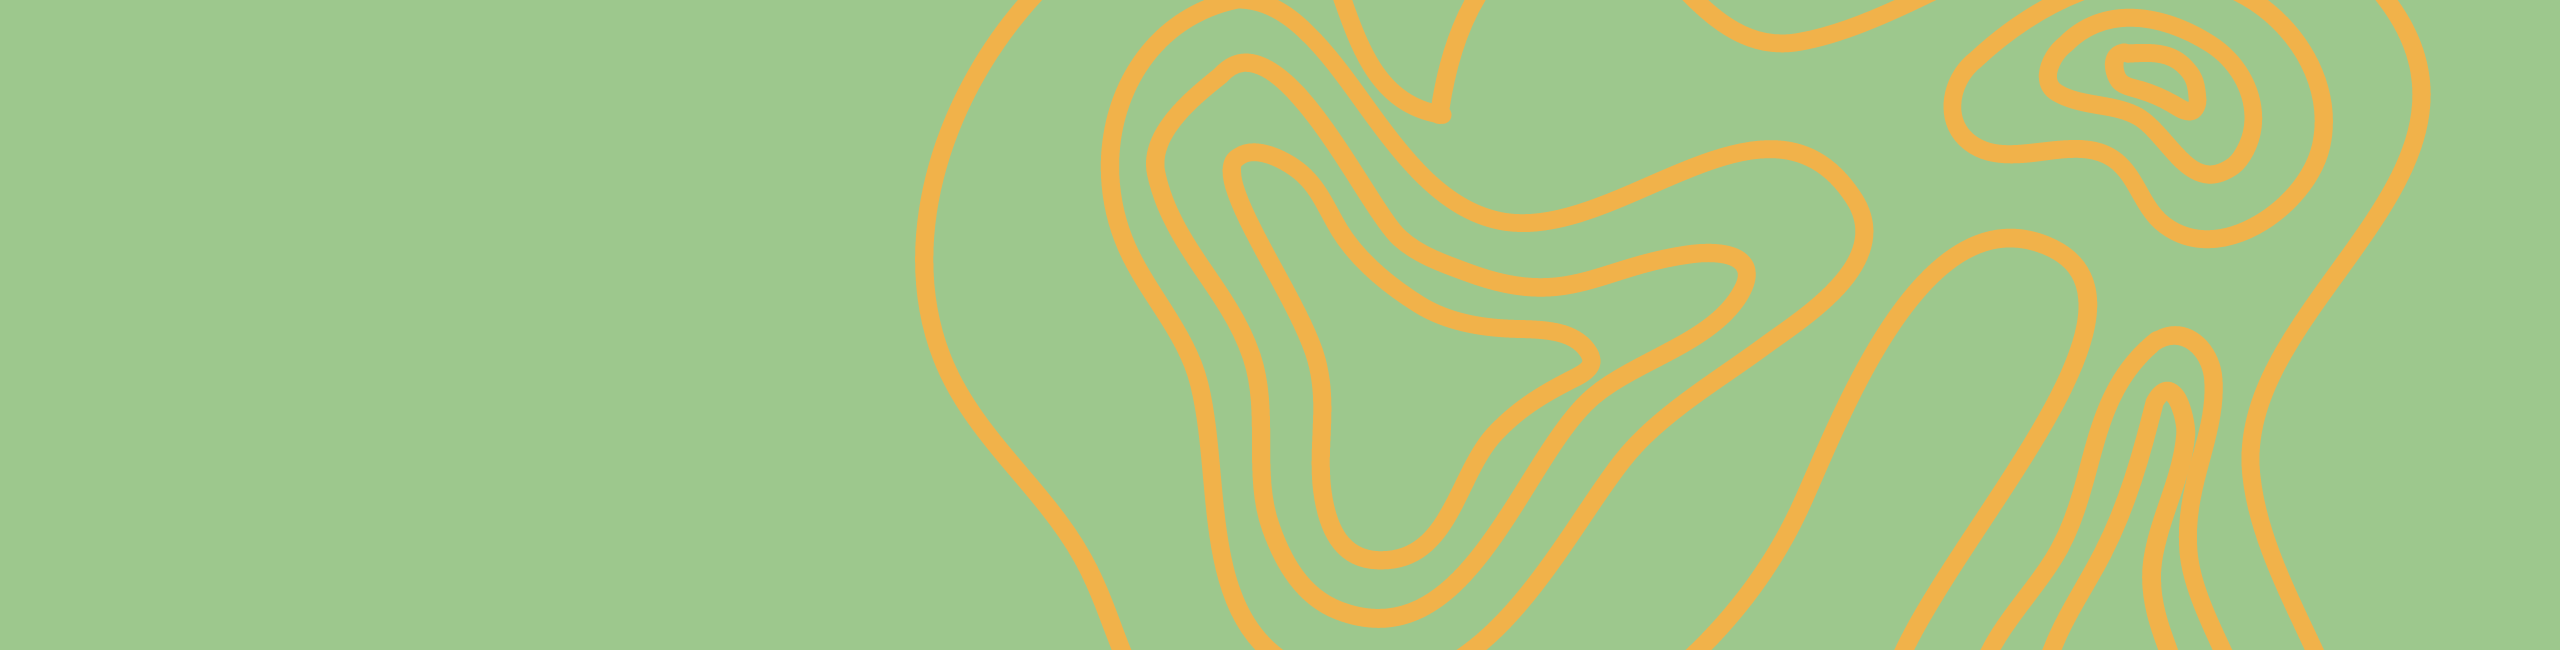

In [17]:
from IPython.display import Image
Image(filename='banner.png') 

# Explore your favourite novel with Python | 35 minutes | Part I: Preprocessing

## Step 1: Import Libraries & Download NLTK package

In [3]:
from urllib import request # to open urls  
from nltk import pos_tag, RegexpParser # to help mark up words for what part of speech they are in context 
from nltk.corpus import stopwords, wordnet # to get rid of filler words
from nltk.stem import WordNetLemmatizer # to reduce words to their root forms 
from nltk.tokenize import RegexpTokenizer # to chop up text into little bits 
import nltk
# python.exe -m pip install --upgrade pip

In [4]:
nltk.download() 

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Step 2: Read in your favourite Gutenberg book 

In [ ]:
# construct the download url = for your Gutenberg title, place 5200 with your book's ID number
url = 'https://www.gutenberg.org/files/5200/5200-0.txt'

In [ ]:
response = request.urlopen(url)
print(response)

In [ ]:
raw = response.read().decode('utf8')
print(raw)

The Project Gutenberg eBook of Metamorphosis, by Franz Kafka

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **

Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: May 13, 2002 [eBook #5200]
[Most recently updated: May 20, 2012]

Language: English

Character set encoding: UTF-8

Copyright (C) 2002 by David Wyllie.

*** START OF THE PROJECT GUTENBERG EBOOK METAMORPHOSIS ***




Metamorphosis

by Franz Kafka

Translated by David Wyllie




In [ ]:
type(raw)

str

## Step 3: Normalise text (all lower case) 

In [ ]:
normalised = raw.lower()
print(normalised[1050:1500])


one morning, when gregor samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin. he lay on his
armour-like back, and if he lifted his head a little he could see his
brown belly, slightly domed and divided by arches into stiff sections.
the bedding was hardly able to cover it and seemed ready to slide off
any moment. his many legs, pitifully thin compared with the size of the
rest of him, waved abou


## Step 3: Tokenisation & Noise Removal in One Fell Swoop

- there are many ways to skin a cat - FUN! 

> you can use a regular expression on its own, inbuilt Python or you can use an NLTK tokeniser that tokenises *and* removes any character that is not a word at the same time. 
<br>
> I like BOGOF so I went with the package deal. 

In [ ]:
tokeniser = RegexpTokenizer(r'\w+') # instantiates a tokeniser combined with a regular expression which selects only words
tokenised = tokeniser.tokenize(normalised)
print(tokenised)

['the', 'project', 'gutenberg', 'ebook', 'of', 'metamorphosis', 'by', 'franz', 'kafka', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'united', 'states', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'www', 'gutenberg', 'org', 'if', 'you', 'are', 'not', 'located', 'in', 'the', 'united', 'states', 'you', 'will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'ebook', 'this', 'is', 'a', 'copyrighted', 'project', 'gutenberg', 'ebook', 'details', 'below', 'please', 'follow', 'the', 'copyright', 'guidelines', 'in', 'this', 'file', 'title', 'metamorphosis', 'author', 'franz', 'kafka', 't

## Step 4: Remove stopwords 

In [ ]:
stopwords = set(stopwords.words('english')) # defines and grabs English filler words 
print(stopwords)

{'a', 'at', 'itself', 'had', 'those', 'because', 'so', 'mustn', 'other', "she's", 'before', 'did', "needn't", "isn't", 'will', 'over', 'here', 'it', 'does', 'some', 'themselves', 'any', 'against', 'while', "hadn't", 'and', 'our', 'further', 'the', 'once', 'needn', 'we', "aren't", "it's", 'just', 'should', 'he', 'were', 'with', 'you', 'mightn', 'herself', 'how', 'both', 'yourselves', 'more', 'to', 'too', 'shouldn', 'when', "doesn't", 'few', "should've", 'll', 'doesn', "haven't", 'are', 'no', 'doing', 't', 'all', 'have', 'didn', 'than', 'through', 'but', 'why', "shouldn't", 'below', 'isn', 'shan', 'in', 'don', 'of', "you'd", 'these', 'out', "shan't", 'into', 'very', 'him', 'this', 'its', 'or', 'then', "mightn't", 'having', 'do', 'whom', 'between', 'can', 'from', 'down', 'until', 'above', 'by', 'such', 'now', 'hasn', 'hadn', 'same', 'under', 'for', 'yourself', 'himself', 'ours', 'your', "you'll", 'haven', "that'll", 'me', 'ain', 'which', 'o', 'if', 'off', "weren't", 'each', 'i', 'be', 'ab

In [ ]:
nostopwords = [word for word in tokenised if word not in stopwords] 
print(nostopwords)

['project', 'gutenberg', 'ebook', 'metamorphosis', 'franz', 'kafka', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'states', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'use', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'www', 'gutenberg', 'org', 'located', 'united', 'states', 'check', 'laws', 'country', 'located', 'using', 'ebook', 'copyrighted', 'project', 'gutenberg', 'ebook', 'details', 'please', 'follow', 'copyright', 'guidelines', 'file', 'title', 'metamorphosis', 'author', 'franz', 'kafka', 'translator', 'david', 'wyllie', 'release', 'date', 'may', '13', '2002', 'ebook', '5200', 'recently', 'updated', 'may', '20', '2012', 'language', 'english', 'character', 'set', 'encoding', 'utf', '8', 'copyright', 'c', '2002', 'david', 'wyllie', 'start', 'project', 'gutenberg', 'ebook', 'metamorphosis', 'metamorphosis', 'franz', 'kafka', 'translated', 'david', 'wyllie', 'one', 'morning', 'gregor', 'samsa', '

# Step 5: Lemmatise 

Lemmatization converts the word to its meaningful base form, which is called Lemma. 


In [ ]:
lemmatiser = WordNetLemmatizer()
print(type(lemmatiser))

<class 'nltk.stem.wordnet.WordNetLemmatizer'>


In [ ]:
lemmatise_churches = lemmatiser.lemmatize('churches')
print(lemmatise_churches)

church


In [ ]:
lemmatised = [lemmatiser.lemmatize(token) for token in nostopwords]
print(lemmatised)

['project', 'gutenberg', 'ebook', 'metamorphosis', 'franz', 'kafka', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'state', 'part', 'world', 'cost', 'almost', 'restriction', 'whatsoever', 'may', 'copy', 'give', 'away', 'use', 'term', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'www', 'gutenberg', 'org', 'located', 'united', 'state', 'check', 'law', 'country', 'located', 'using', 'ebook', 'copyrighted', 'project', 'gutenberg', 'ebook', 'detail', 'please', 'follow', 'copyright', 'guideline', 'file', 'title', 'metamorphosis', 'author', 'franz', 'kafka', 'translator', 'david', 'wyllie', 'release', 'date', 'may', '13', '2002', 'ebook', '5200', 'recently', 'updated', 'may', '20', '2012', 'language', 'english', 'character', 'set', 'encoding', 'utf', '8', 'copyright', 'c', '2002', 'david', 'wyllie', 'start', 'project', 'gutenberg', 'ebook', 'metamorphosis', 'metamorphosis', 'franz', 'kafka', 'translated', 'david', 'wyllie', 'one', 'morning', 'gregor', 'samsa', 'woke', '

## Step 6: POS tagging

In [ ]:
pos_tagged_text = []
pos_tagged_text.append(pos_tag(lemmatised))
print(pos_tagged_text)

[[('project', 'NN'), ('gutenberg', 'NN'), ('ebook', 'NN'), ('metamorphosis', 'NN'), ('franz', 'NN'), ('kafka', 'NN'), ('ebook', 'NN'), ('use', 'NN'), ('anyone', 'NN'), ('anywhere', 'RB'), ('united', 'JJ'), ('state', 'NN'), ('part', 'NN'), ('world', 'NN'), ('cost', 'NN'), ('almost', 'RB'), ('restriction', 'NN'), ('whatsoever', 'NN'), ('may', 'MD'), ('copy', 'VB'), ('give', 'VB'), ('away', 'RP'), ('use', 'JJ'), ('term', 'NN'), ('project', 'NN'), ('gutenberg', 'NN'), ('license', 'NN'), ('included', 'VBD'), ('ebook', 'JJ'), ('online', 'NN'), ('www', 'NN'), ('gutenberg', 'NN'), ('org', 'NN'), ('located', 'VBN'), ('united', 'JJ'), ('state', 'NN'), ('check', 'NN'), ('law', 'NN'), ('country', 'NN'), ('located', 'VBD'), ('using', 'VBG'), ('ebook', 'NN'), ('copyrighted', 'VBN'), ('project', 'NN'), ('gutenberg', 'NN'), ('ebook', 'NN'), ('detail', 'NN'), ('please', 'NN'), ('follow', 'VB'), ('copyright', 'JJ'), ('guideline', 'NN'), ('file', 'NN'), ('title', 'NN'), ('metamorphosis', 'NN'), ('author'

### Thanks for your time and attention! Next time: Parsing & getting started with making sense/insights into this novella. 